# Курсовой проект по курсу: Библиотеки Python для Data Science. Продоолжение



# Оглавление <a name='index'>

 Загрузка всего
 
 [Смотрим Пропуски](#nulls)

**Обзор Данных:**

* **[Home Ownership](#1_hw)** - домовладение 
* **[Annual Income](#2_ai)** - годовой доход (**1557 пропусков**)
* **[Years in current job](#3_yicj)** - количество лет на текущем месте работы (**371 пропуск**)
* **[Tax Liens](#4_tl)** - налоговые обременения -
* **[Number of Open Accounts](#5_nooa)** - количество открытых счетов -
* **[Years of Credit History](#6_yoch)** - количество лет кредитной истории -
* **[Maximum Open Credit](#7_moc)** - наибольший открытый кредит -
* **[Number of Credit Problems](#8_nocp)** - количество проблем с кредитом -
* **[Months since last delinquent](#9_msld)** - количество месяцев с последней просрочки платежа (**4071 пропуск**)
* **[Bankruptcies](#10_b)** - банкротства (**14 пропусков**)
* **[Purpose](#11_p)** - цель кредита
* **[Term](#12_t)** - срок кредита
* **[Current Loan Amount](#13_cla)** - текущая сумма кредита
* **[Current Credit Balance](#14_ccb)** - текущий кредитный баланс -
* **[Monthly Debt](#15_md)** - ежемесячный долг -
* **[Credit Score](#16_cs)** - кредитный рейтинг (**1557 пропусков**)
* **[Credit Default](#17_cd)** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка) 

**[Заполнение Month since last delinquent на основе других столбцов](#monthNULL)** - **пока НЕ РАБОТАЕТ**

**[Новый признак](#new)** - вместо `Tax Liens`, `Number of Credit Problems` и `Bankruptcies` делаю один признак, а эти исключаю

**[Смотрим, что получилось после обработки данных](#look)**

**[Обучение на моделях](#20_learn)**

## Загрузка всего <a name='load'></a>

[к оглавлению](#index)

In [1]:
# Загрузка библиотек:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# Алгоритмы кластеризации (какие нашел)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

# Метрика F1:
from sklearn.metrics import f1_score

# для статистики
from scipy.stats import chi2_contingency

In [2]:
# Загрузка наборов данных:

df = pd.read_csv('course_project_train.csv')
df_test = pd.read_csv('course_project_test.csv')

In [3]:
# Добавляем в тренировочный набор нанных поле ID

df['ID'] = df.index.tolist()

## Обзор данных <a name='view'>
    
[к оглавлению](#index)

In [4]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,ID
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,2
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,3
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,4


In [5]:
df.shape

(7500, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.00,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.00,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.00,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.50,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.50,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.00,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.00,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.00,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.00,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.50,209323.0,360406.25,6.506797e+06


In [8]:
# смотрим на целевую переменную

df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

## Пропуски <a name="nulls"></a>

`на train и test пропуски совпадают`

[к оглавлению](#index)

In [9]:
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
ID                                 0
dtype: int64

In [10]:
len(df_test) - df_test.count()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

## Служебные функции <a name="work"></a>

[к оглавлению](#index)

In [11]:
# функция показывает корреляцию мжду двумя группами одного признака в отношении целевого признака. 
# если результат больше 0.05 - можно объединять в один

def corr_(val, x1, x2):
    pay1_and_target_s = df.loc[df[val].isin([x1, x2]), ['ID', val, 'Credit Default']]#.sample(1000)
    table = pay1_and_target_s.pivot_table(values='ID', index=val, columns='Credit Default', aggfunc='count')
    chi2, p, dof, expected = chi2_contingency(table, correction=False)
    print(p)

# Обработка данных

### Home Ownership - домовладение <a name="1_hw"></a>

[к оглавлению](#index)

In [12]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

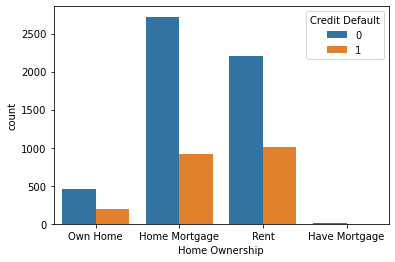

In [13]:
sns.countplot(x="Home Ownership", hue='Credit Default', data=df)
plt.show()

In [14]:
df = pd.concat([df, pd.get_dummies(df['Home Ownership'], prefix='Home Ownership')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Home Ownership'], prefix='Home Ownership')], axis=1)

### Annual Income - годовой доход <a name="2_ai"></a>

`null заменил на 0 - из всех испробованных мной вариантов этот дамет максимальный реультат...`

[к оглавлению](#index)

In [15]:
df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

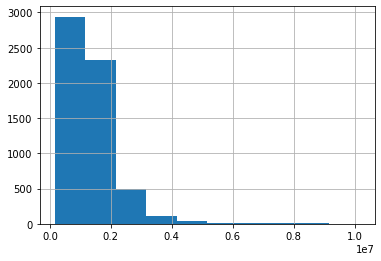

In [16]:
df['Annual Income'].hist()

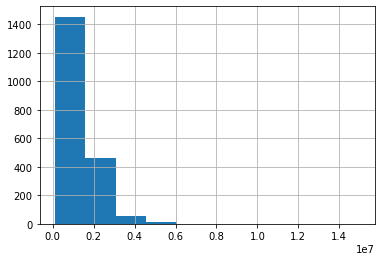

In [17]:
df_test['Annual Income'].hist()

In [18]:
df.loc[df['Annual Income'].isnull(), 'Annual Income'] = 0
df_test.loc[df_test['Annual Income'].isnull(), 'Annual Income'] = 0

### Years in current job - количество лет на текущем месте работы <a name="3_yicj"></a>

[к оглавлению](#index)

In [19]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

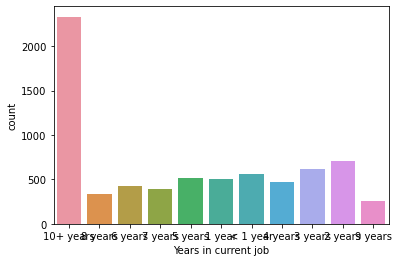

In [20]:
sns.countplot(x="Years in current job", data=df)
plt.show()

In [21]:
df['Years in current job'] = df['Years in current job'].map({
                                                            '10+ years':'10', 
                                                            '9 years':'9',
                                                            '8 years':'8',
                                                            '7 years':'7',
                                                            '6 years':'6',
                                                            '5 years':'5',
                                                            '4 years':'4',
                                                            '3 years':'3',
                                                            '2 years':'2',
                                                            '1 year':'1',
                                                            '< 1 year':'0'
                                                            }).astype(float)

df.loc[df['Years in current job'].isnull(), 'Years in current job'] = 11



df_test['Years in current job'] = df_test['Years in current job'].map({
                                                            '10+ years':'10', 
                                                            '9 years':'9',
                                                            '8 years':'8',
                                                            '7 years':'7',
                                                            '6 years':'6',
                                                            '5 years':'5',
                                                            '4 years':'4',
                                                            '3 years':'3',
                                                            '2 years':'2',
                                                            '1 year':'1',
                                                            '< 1 year':'0'
                                                            }).astype(float)

df_test.loc[df_test['Years in current job'].isnull(), 'Years in current job'] = 11

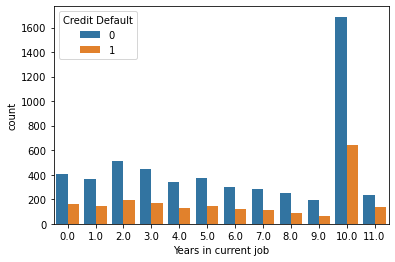

In [22]:
sns.countplot(x="Years in current job", hue='Credit Default', data=df)
plt.show()

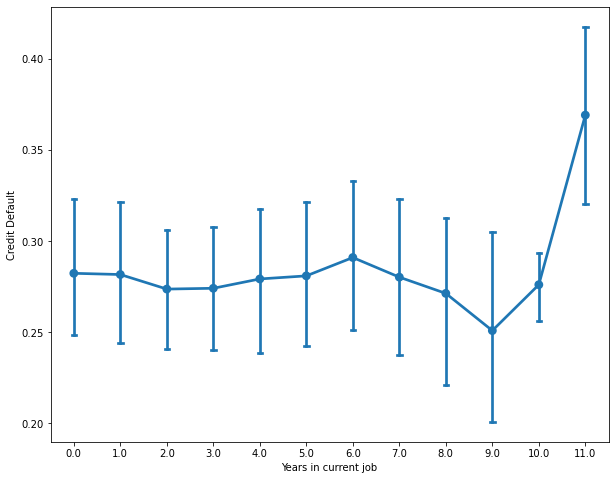

In [23]:
plt.figure(figsize=(10, 8))
sns.pointplot(x='Years in current job', y='Credit Default', data=df, capsize=.1,);

In [24]:
# другой ВАРИАНТ: можно попробовать поделить все вообще на 2 категории. Но при этом почему-то на test результат чуть хуже...

# df.loc[(df['Years in current job'] < 11), 'Years in current job'] = 1
# df.loc[(df['Years in current job'] == 11), 'Years in current job'] = 0

### Tax Liens - налоговые обременения <a name="4_tl"></a>

[к оглавлению](#index)

In [25]:
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [26]:
# df['Tax Liens'].hist()

In [27]:
# df_test['Tax Liens'].hist()

In [28]:
# df.loc[(df['Tax Liens'] > 0), 'Tax Liens'] = 1

In [29]:
# df['Tax Liens'].value_counts()

In [30]:
# sns.countplot(x="Tax Liens", hue='Credit Default', data=df)
# plt.show()

In [31]:
# df['No Tax Liens'] = (df['Tax Liens'] == 0)

In [32]:
# df['No Tax Liens'].value_counts()

In [33]:
# corr_('Tax Liens',0,1)

### Number of Open Accounts - количество открытых счетов <a name="5_nooa"></a>

[к оглавлению](#index)

In [34]:
# df['Number of Open Accounts'].value_counts()

In [35]:
# df['Number of Open Accounts'].describe()

In [36]:
# df_test['Number of Open Accounts'].describe()

In [37]:
# df['Number of Open Accounts'].hist()

# plt.figure(figsize=(20, 8))
# sns.countplot(x="Number of Open Accounts", hue='Credit Default', data=df)
# plt.show()

In [38]:
# ВАРИАНТ 2 - вообще ничего не делать

# df.loc[(df['Number of Open Accounts'] >= 22), 'Number of Open Accounts'] = 4

# df.loc[(df['Number of Open Accounts'] < 7),'Number of Open Accounts'] = 0
# df.loc[(df['Number of Open Accounts'] >= 7) & (df['Number of Open Accounts'] < 9),'Number of Open Accounts'] = 1
# df.loc[(df['Number of Open Accounts'] >= 9) & (df['Number of Open Accounts'] < 15),'Number of Open Accounts'] = 2
# df.loc[(df['Number of Open Accounts'] >= 15) & (df['Number of Open Accounts'] < 22),'Number of Open Accounts'] = 3
# df.loc[(df['Number of Open Accounts'] >= 11),'Number of Open Accounts'] = 4


In [39]:
# sns.countplot(x="Number of Open Accounts", hue='Credit Default', data=df)
# plt.show()

In [40]:
# corr_('Number of Open Accounts',0,1)
# corr_('Number of Open Accounts',0,2)
# corr_('Number of Open Accounts',0,3)

# corr_('Number of Open Accounts',1,2)
# corr_('Number of Open Accounts',1,3)

# corr_('Number of Open Accounts',2,3)

### Years of Credit History - коичество лет кредитной истории <a name="6_yoch"></a>

[к оглавлению](#index)

In [41]:
# df['Years of Credit History'].value_counts()

In [42]:
# df['Years of Credit History'].hist()

In [43]:
# df_test['Years of Credit History'].hist()

In [44]:
# df.loc[(df['Years of Credit History'] < 7),'Years of Credit History'] = 0
# df.loc[(df['Years of Credit History'] >= 7) & (df['Years of Credit History'] < 10),'Years of Credit History'] = 1
# df.loc[(df['Years of Credit History'] >= 10) & (df['Years of Credit History'] < 20),'Years of Credit History'] = 2
# df.loc[(df['Years of Credit History'] >= 20) & (df['Years of Credit History'] < 30),'Years of Credit History'] = 3
# df.loc[(df['Years of Credit History'] >= 30),'Years of Credit History'] = 4

In [45]:
# sns.countplot(x="Years of Credit History", hue='Credit Default', data=df)
# plt.show()

In [46]:
# df.loc[(df['Years of Credit History'] > 40), 'Years of Credit History'] = 40

# на ТЕСТЕ
# df_test.loc[(df_test['Years of Credit History'] > 40), 'Years of Credit History'] = 40

In [47]:
# corr_('Years of Credit History',0,1)
# corr_('Years of Credit History',0,2)
# corr_('Years of Credit History',0,3)
# corr_('Years of Credit History',0,4)

# corr_('Years of Credit History',1,2)
# corr_('Years of Credit History',1,3)
# corr_('Years of Credit History',1,4)

# corr_('Years of Credit History',2,3)
# corr_('Years of Credit History',2,4)

# corr_('Years of Credit History',3,4)

### Maximum Open Credit - наибольший открытый кредит <a name="7_moc"></a>

[к оглавлению](#index)

In [48]:
# df['Maximum Open Credit'].value_counts()

In [49]:
# df['Maximum Open Credit'].describe()

In [50]:
# df_test['Maximum Open Credit'].describe()

In [51]:
# df['Maximum Open Credit'].hist()

In [52]:
# df_test['Maximum Open Credit'].hist()

In [53]:
# df.loc[(df['Maximum Open Credit'] < 800000), 'Maximum Open Credit'] = 0
# df.loc[(df['Maximum Open Credit'] >= 200000) & (df['Maximum Open Credit'] < 400000), 'Maximum Open Credit'] = 1
# df.loc[(df['Maximum Open Credit'] >= 400000) & (df['Maximum Open Credit'] < 600000), 'Maximum Open Credit'] = 2
# df.loc[(df['Maximum Open Credit'] >= 600000) & (df['Maximum Open Credit'] < 800000), 'Maximum Open Credit'] = 3
# df.loc[(df['Maximum Open Credit'] >= 800000) & (df['Maximum Open Credit'] < 1000000), 'Maximum Open Credit'] = 4
# df.loc[(df['Maximum Open Credit'] >= 800000), 'Maximum Open Credit'] = 1


# на ТЕСТЕ
# df_test.loc[(df_test['Maximum Open Credit'] < 200000), 'Maximum Open Credit'] = 0
# df_test.loc[(df_test['Maximum Open Credit'] >= 200000) & (df_test['Maximum Open Credit'] < 400000), 'Maximum Open Credit'] = 1
# df_test.loc[(df_test['Maximum Open Credit'] >= 400000) & (df_test['Maximum Open Credit'] < 600000), 'Maximum Open Credit'] = 2
# df_test.loc[(df_test['Maximum Open Credit'] >= 600000) & (df_test['Maximum Open Credit'] < 800000), 'Maximum Open Credit'] = 3
# df_test.loc[(df_test['Maximum Open Credit'] >= 800000) & (df_test['Maximum Open Credit'] < 1000000), 'Maximum Open Credit'] = 4
# df_test.loc[(df_test['Maximum Open Credit'] >= 1000000), 'Maximum Open Credit'] = 5

In [54]:
# sns.countplot(x="Maximum Open Credit", hue='Credit Default', data=df)
# plt.show()

In [55]:
# corr_('Maximum Open Credit', 0, 1)

# corr_('Maximum Open Credit', 0, 2)
# corr_('Maximum Open Credit', 0, 3)
# corr_('Maximum Open Credit', 0, 4)
# corr_('Maximum Open Credit', 0, 5)

# corr_('Maximum Open Credit', 1, 2)
# corr_('Maximum Open Credit', 1, 3)
# corr_('Maximum Open Credit', 1, 4)
# corr_('Maximum Open Credit', 1, 5)

# corr_('Maximum Open Credit', 4, 5)

### Number of Credit Problems - количество проблем с кредитом <a name="8_nocp"></a>

[к оглавлению](#index)

In [56]:
# df['Number of Credit Problems'].value_counts()

In [57]:
# sns.countplot(x="Number of Credit Problems", data=df)
# plt.show()

In [58]:
# sns.countplot(x="Number of Credit Problems", data=df_test)
# plt.show()

In [59]:
# df.loc[(df['Number of Credit Problems'] > 0), 'Number of Credit Problems'] = 1

In [60]:
# sns.countplot(x="Number of Credit Problems", hue='Credit Default', data=df)
# sns.countplot(x="Number of Credit Problems", hue='Bankruptcies', data=df)
# plt.show()

In [61]:
# corr_('Number of Credit Problems', 0 , 1)
# corr_('Number of Credit Problems', 0 , 2)

# corr_('Number of Credit Problems', 1 , 2)

### Months since last delinquent - количество месяцев с последней просрочки кредита <a name=9_msld>

`пока не трогаю. далее заполняю на основе других столцов`
    
[к оглавлению](#index)

In [62]:
# df['Months since last delinquent'].describe()

In [63]:
# df['Months since last delinquent'].hist()

In [64]:
# df_test['Months since last delinquent'].hist()

In [65]:
# sns.countplot(x="Months since last delinquent", hue='Credit Default', data=df)
# plt.show()

In [66]:
# baseline. Null заменяем на 0 + выделяем в ОТДЕЛЬНЫЙ ПРИЗНАК

df['Months since last delinquent NULL'] = df['Months since last delinquent'].isnull()
df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

df_test['Months since last delinquent NULL'] = df_test['Months since last delinquent'].isnull()
df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

# -------------------------

# df.loc[(df['Months since last delinquent'] >= 0), 'Months since last delinquent'] = 0
# df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 1

# df_test.loc[(df_test['Months since last delinquent'] >= 0), 'Months since last delinquent'] = 0
# df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 1


# вариант 2

# df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = df['Months since last delinquent'].median()
# df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = df['Months since last delinquent'].mean()
# df.loc[(df['Months since last delinquent'] > 50), 'Months since last delinquent'] = 50

# df.loc[(df['Months since last delinquent'] == 0), 'Months since last delinquent'] = 0
# df.loc[(df['Months since last delinquent'] >= 0) & (df['Months since last delinquent'] < 12), 'Months since last delinquent'] = 0
# df.loc[(df['Months since last delinquent'] >= 12) & (df['Months since last delinquent'] < 24), 'Months since last delinquent'] = 1
# df.loc[(df['Months since last delinquent'] >= 24) & (df['Months since last delinquent'] < 36), 'Months since last delinquent'] = 2
# df.loc[(df['Months since last delinquent'] >= 36) & (df['Months since last delinquent'] < 48), 'Months since last delinquent'] = 3
# df.loc[(df['Months since last delinquent'] >= 48), 'Months since last delinquent'] = 4
# df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 5

# df_test.loc[(df_test['Months since last delinquent'] == 0), 'Months since last delinquent'] = 0
# df_test.loc[(df_test['Months since last delinquent'] >= 0) & (df_test['Months since last delinquent'] < 12), 'Months since last delinquent'] = 0
# df_test.loc[(df_test['Months since last delinquent'] >= 12) & (df_test['Months since last delinquent'] < 24), 'Months since last delinquent'] = 1
# df_test.loc[(df_test['Months since last delinquent'] >= 24) & (df_test['Months since last delinquent'] < 36), 'Months since last delinquent'] = 2
# df_test.loc[(df_test['Months since last delinquent'] >= 36) & (df_test['Months since last delinquent'] < 48), 'Months since last delinquent'] = 3
# df_test.loc[(df_test['Months since last delinquent'] >= 48), 'Months since last delinquent'] = 4
# df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 5

In [67]:
# sns.countplot(x="Months since last delinquent", hue='Credit Default', data=df)
# plt.show()

In [68]:
# sns.countplot(x="Months since last delinquent", data=df_test)
# plt.show()

In [69]:
# corr_('Months since last delinquent', 0,1)
# corr_('Months since last delinquent', 1,2)
# corr_('Months since last delinquent', 1,3)
# corr_('Months since last delinquent', 1,4)
# corr_('Months since last delinquent', 1,5)

# corr_('Months since last delinquent', 1,2)
# corr_('Months since last delinquent', 1,3)
# corr_('Months since last delinquent', 1,4)

### Bankruptcies - банкротства <a name=10_b>

[к оглавлению](#index)

In [70]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [71]:
df_test['Bankruptcies'].value_counts()

0.0    2252
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64

In [72]:
df.loc[df['Bankruptcies'].isnull(), 'Bankruptcies'] = 0
# df.loc[(df['Bankruptcies'] > 0), 'Bankruptcies'] = 1

df_test.loc[df_test['Bankruptcies'].isnull(), 'Bankruptcies'] = 0

In [73]:
# sns.countplot(x="Bankruptcies", hue='Credit Default', data=df)
# plt.show()

In [74]:
# corr_('Bankruptcies', 0,1)

### Purpose - цель кредита <a name=11_p>

[к оглавлению](#index)

In [75]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [76]:
df_test['Purpose'].value_counts()

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
educational expenses       3
vacation                   3
wedding                    2
moving                     1
Name: Purpose, dtype: int64

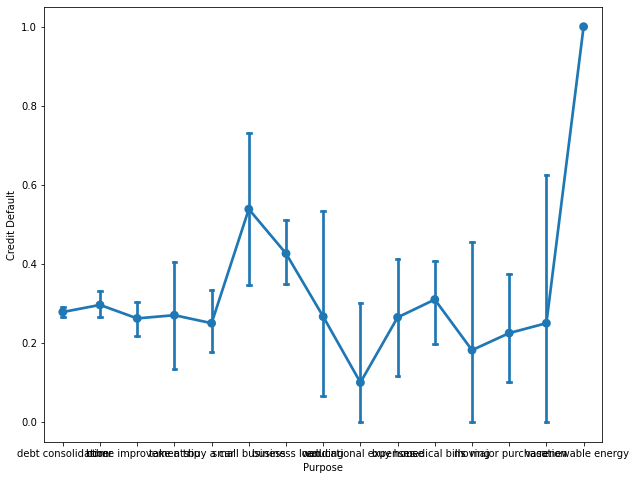

In [77]:
plt.figure(figsize=(10, 8))
sns.pointplot(x='Purpose', y='Credit Default', data=df, capsize=.1,);

In [78]:
# по графику видно, что можно можно разделить всего на 4 категории

df['Purpose'] = df['Purpose'].map({
                                'debt consolidation':'0', 
                                'other':'0',
                                'home improvements':'0',
                                'business loan':'1',
                                'buy a car':'0',
                                'medical bills':'0',
                                'major purchase':'0',
                                'take a trip':'0',
                                'buy house':'0',
                                'small business':'2',
                                'wedding':'0',
                                'moving':'0',
                                'educational expenses':'3',
                                'vacation':'0',
                                'renewable energy':'0'
                                }).astype(float)

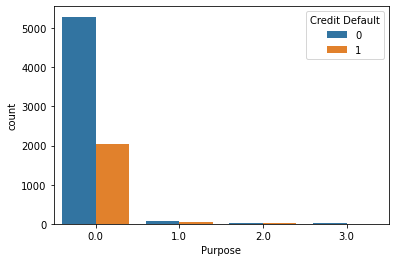

In [79]:
sns.countplot(x="Purpose", hue='Credit Default', data=df)
plt.show()

In [80]:
df_test['Purpose'] = df_test['Purpose'].map({
                                'debt consolidation':'0', 
                                'other':'0',
                                'home improvements':'0',
                                'business loan':'1',
                                'buy a car':'0',
                                'medical bills':'0',
                                'major purchase':'0',
                                'take a trip':'0',
                                'buy house':'0',
                                'small business':'2',
                                'wedding':'0',
                                'moving':'0',
                                'educational expenses':'3',
                                'vacation':'0',
                                'renewable energy':'0'
                                }).astype(float)

### Term - срок кредита - срок кредита <a name=12_t>

[к оглавлению](#index)

In [81]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

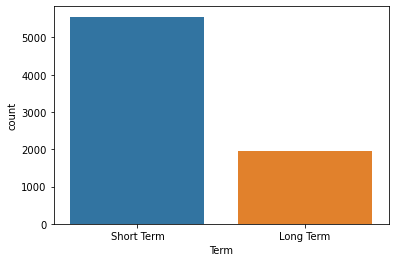

In [82]:
sns.countplot(x="Term", data=df)
plt.show()

In [83]:
df['Term'] = df['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(float)
df_test['Term'] = df_test['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(float)

In [84]:
# df['Term'].value_counts()

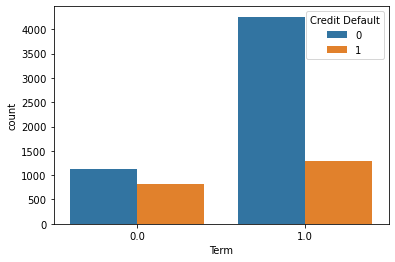

In [85]:
sns.countplot(x="Term", hue='Credit Default', data=df)
plt.show()

In [86]:
corr_('Term',0,1)

1.1519373940439208e-55


### Current Loan Amount - текущая сумма кредита <a name=13_cla>

`большие выбросы выделил в отдельную переменную (это вариант показал лучшие результаты)`
    
[к оглавлению](#index)

In [87]:
# df = pd.read_csv('course_project_train.csv')

In [88]:
df['Current Loan Amount'].value_counts()
# df['Current Loan Amount BIG'].value_counts()

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

In [89]:
df['Current Loan Amount'].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

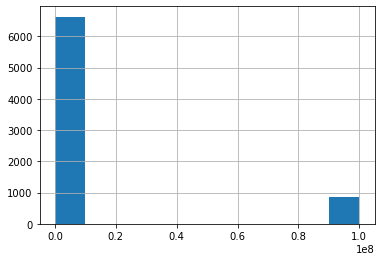

In [90]:
df['Current Loan Amount'].hist()

In [91]:
# вынос больших выбросов в отдельную переменную. результат не меняется: 0.53, 0.52, 0.52 || 0.53

df['Current Loan Amount BIG'] = df['Current Loan Amount'] == 99999999
df_test['Current Loan Amount BIG'] = df_test['Current Loan Amount'] == 99999999

### Current Credit Balance - текущий кредитный баланс <a name=14_ccb>

[к оглавлению](#index)

In [92]:
# df['Current Credit Balance'].describe()

In [93]:
# df['Current Credit Balance'].hist()

In [94]:
# df_test['Current Credit Balance'].hist()

In [95]:
# df = pd.read_csv('course_project_train.csv')

In [96]:
# df.loc[(df['Current Credit Balance'] < 100000), 'Current Credit Balance'] = 0
# df.loc[(df['Current Credit Balance'] >= 100000) & (df['Current Credit Balance'] < 200000), 'Current Credit Balance'] = 1
# df.loc[(df['Current Credit Balance'] >= 200000) & (df['Current Credit Balance'] < 300000), 'Current Credit Balance'] = 2
# df.loc[(df['Current Credit Balance'] >= 300000) & (df['Current Credit Balance'] < 400000), 'Current Credit Balance'] = 3
# df.loc[(df['Current Credit Balance'] >= 400000), 'Current Credit Balance'] = 4


# df_test.loc[(df_test['Current Credit Balance'] < 100000), 'Current Credit Balance'] = 0
# df_test.loc[(df_test['Current Credit Balance'] >= 100000) & (df_test['Current Credit Balance'] < 200000), 'Current Credit Balance'] = 1
# df_test.loc[(df_test['Current Credit Balance'] >= 200000) & (df_test['Current Credit Balance'] < 300000), 'Current Credit Balance'] = 2
# df_test.loc[(df_test['Current Credit Balance'] >= 300000) & (df_test['Current Credit Balance'] < 400000), 'Current Credit Balance'] = 3
# df_test.loc[(df_test['Current Credit Balance'] >= 400000), 'Current Credit Balance'] = 4

In [97]:
# df['Current Credit Balance'].value_counts()

In [98]:
# sns.countplot(x="Current Credit Balance", hue='Credit Default', data=df)
# plt.show()

In [99]:
# corr_('Current Credit Balance', 0,1)
# corr_('Current Credit Balance', 1,2)
# corr_('Current Credit Balance', 2,3)
# corr_('Current Credit Balance', 3,5)

### Monthly Debt - ежемесячный долг <a name=15_md>

[к оглавлению](#index)

In [100]:
# df['Monthly Debt'].value_counts()

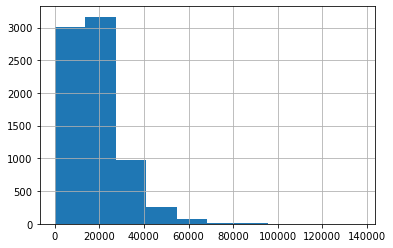

In [101]:
df['Monthly Debt'].hist()

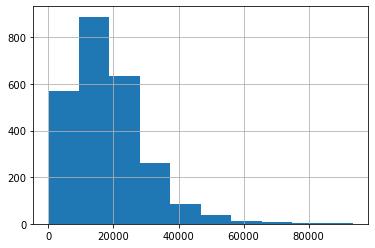

In [102]:
df_test['Monthly Debt'].hist()

In [103]:
# sns.countplot(x="Monthly Debt", hue='Credit Default', data=df)
# plt.show()

In [104]:
# df.loc[(df['Monthly Debt'] < 15000), 'Monthly Debt'] = 0

# df.loc[(df['Monthly Debt'] >= 15000) & (df['Monthly Debt'] < 25000), 'Monthly Debt'] = 1
# df.loc[(df['Monthly Debt'] >= 25000) & (df['Monthly Debt'] < 40000), 'Monthly Debt'] = 2
# df.loc[(df['Monthly Debt'] >= 40000) & (df['Monthly Debt'] < 55000), 'Monthly Debt'] = 3
# df.loc[(df['Monthly Debt'] >= 55000), 'Monthly Debt'] = 4

In [105]:
# sns.countplot(x="Monthly Debt", hue='Credit Default', data=df)
# plt.show()

In [106]:
# corr_('Monthly Debt', 0,1)
# corr_('Monthly Debt', 0,2)
# corr_('Monthly Debt', 0,3)
# corr_('Monthly Debt', 0,4)

### Credit Score - кредитный рейтинг <a name=16_cs>
    
`отановился на варианте разиения показателя на категории, согласно таблице Кредитного Скролинга из Википдии.
    null выделил в отдельную группу + создал отдельную переменную Credit Score NULL 
    так же объединил категории 1 и 2, поскольку они показали большую корреляцию`

[к оглавлению](#index)

In [107]:
# df['Credit Score NULL'].value_countss()

In [108]:
df['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [109]:
# df['Credit Score'].hist()

In [110]:
df.loc[(df['Credit Score'] < 700), 'Credit Score'] = 0
df.loc[(df['Credit Score'] >= 700) & (df['Credit Score'] < 740), 'Credit Score'] = 1
# df.loc[(df['Credit Score'] >= 720) & (df['Credit Score'] < 740), 'Credit Score'] = 2
df.loc[(df['Credit Score'] >= 740) & (df['Credit Score'] <= 750), 'Credit Score'] = 2
df.loc[(df['Credit Score'] > 750), 'Credit Score'] = 3

df['Credit Score NULL'] = df['Credit Score'].isnull()
df.loc[df['Credit Score'].isnull(), 'Credit Score'] = 4

# df.loc[df['Credit Score'].isnull(), 'Credit Score'] = df['Credit Score'].median()


df_test.loc[(df_test['Credit Score'] < 700), 'Credit Score'] = 0
df_test.loc[(df_test['Credit Score'] >= 700) & (df_test['Credit Score'] < 740), 'Credit Score'] = 1
df_test.loc[(df_test['Credit Score'] >= 740) & (df_test['Credit Score'] <= 750), 'Credit Score'] = 2
df_test.loc[(df_test['Credit Score'] > 750), 'Credit Score'] = 3

df_test['Credit Score NULL'] = df_test['Credit Score'].isnull()
df_test.loc[df_test['Credit Score'].isnull(), 'Credit Score'] = 4

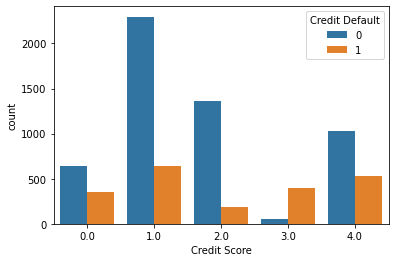

In [111]:
sns.countplot(x="Credit Score", hue='Credit Default', data=df)
plt.show()

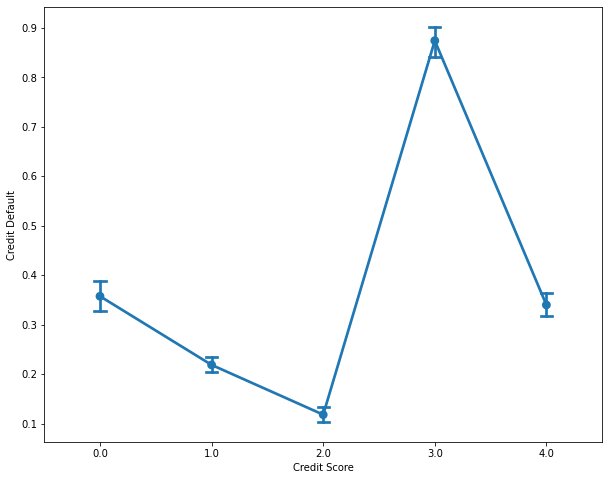

In [112]:
plt.figure(figsize=(10, 8))
sns.pointplot(x='Credit Score', y='Credit Default', data=df, capsize=.1,);

## Заполнение `Month since last delinquent` на основе других столбцов <a name=monthNULL>

[к оглавлению](#index)

In [113]:
# смотрим. в столбце Month since last delinquent 4081 пропусков из 7500. Это много
# df.info()

In [114]:
# тут ЗАПОЛНЕНО - это трайн
# df_m = df[np.isfinite(df['Months since last delinquent'])]
# df_m = df[np.isfinite(df['Credit Score'])]

# тут НЕ ЗАПОЛНЕНО - это тест
# df_m_test = df.loc[df['Months since last delinquent'].isnull()]
# df_m_test = df.loc[df['Credit Score'].isnull()]

In [115]:
# df_m.info()
# df_m_test.info()

In [116]:
# df_m['Purpose'] = df_m['Purpose'].astype(float)
# df_m_test['Purpose'] = df_m_test['Purpose'].astype(float)

In [117]:
# df_m_test['Home Ownership'].value_counts()
# df['Months since last delinquent'].describe()
# df['Months since last delinquent'].hist()

In [118]:
# df_m

In [119]:
# # выбираем столбцы для обучения

# COL_SELECTED_FOR_Months = [
# #        'Home Ownership',
#         'Annual Income',
#         'Years in current job',
#         'Tax Liens',
#         'Number of Open Accounts',
#         'Years of Credit History',
#         'Maximum Open Credit',
#         'Number of Credit Problems',
# #         'Months since last delinquent',
#         'Bankruptcies',
# #         'Purpose',
#         'Term',
#         'Current Loan Amount',
#         'Current Credit Balance',
#         'Monthly Debt',
#         'Credit Score',
#         'Credit Default',
    
#         'Home Ownership_Have Mortgage',
#         'Home Ownership_Home Mortgage',
#         'Home Ownership_Own Home',
#         'Home Ownership_Rent',
    
# #         'Current Loan Amount BIG',
# #         'Credit Score NULL'
#                          ]

In [120]:
# # # смотрим как они коррелируют с нашим полем

# corr_with_target = df_m[COL_SELECTED_FOR_Months + ['Months since last delinquent']].corr().iloc[:-1, -1].sort_values(ascending=False)
# # corr_with_target = df_m[COL_SELECTED_FOR_Months + ['Credit Score']].corr().iloc[:-1, -1].sort_values(ascending=False)
# plt.figure(figsize=(10, 8))
# sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
# plt.title('Correlation with target variable')
# plt.show()

In [121]:
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import r2_score as r2
# from sklearn.model_selection import KFold, GridSearchCV

# from sklearn.linear_model import LinearRegression

In [122]:
# X = df_m[COL_SELECTED_FOR_Months]
# y = df_m['Months since last delinquent']
# # y = df_m['Credit Score']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [123]:
# model = LinearRegression()
# model.fit(X_train,y_train)

# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# print('train: ', r2(y_train, y_pred_train))
# print('test: ', r2(y_test, y_pred_test))

In [124]:
# model = RandomForestRegressor(n_estimators=150, max_depth=20, max_features=6)#, verbose = 1)

# model.fit(X_train, y_train)

# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# print('train: ', r2(y_train, y_train_pred))
# print('test: ', r2(y_test, y_test_pred))

In [125]:
# model = XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0.3, subsample=0.7,min_child_weight=4,
#                            colsample_bytree=1, max_depth=7, objective ='reg:squarederror', nthread=-1, random_state=21)
# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# print('train: ', r2(y_train, y_pred_train))
# print('test: ', r2(y_test, y_pred_test))

In [126]:
# model = GradientBoostingRegressor(alpha=0.9, 
#                                   max_depth=6, 
#                                   max_features=1.0, 
#                                   min_samples_leaf=3, 
#                                   min_samples_split=2, 
#                                   n_estimators=150, 
#                                   random_state=8)
# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# print('train: ', r2(y_train, y_pred_train))
# print('test: ', r2(y_test, y_pred_test))

## Новый признак <a name="new"></a>

[к оглавлению](#index)

In [127]:
# (df['Tax Liens'] == 0).value_counts()

In [128]:
# вариант 1

df['No problems'] = (df['Tax Liens'] == 0) & (df['Bankruptcies'] == 0) & (df['Number of Credit Problems'] == 0)
df_test['No problems'] = (df_test['Number of Credit Problems'] == 0) & (df_test['Bankruptcies'] == 0) & (df_test['Tax Liens'] == 0)

In [129]:
df['No problems'].value_counts()

True     6469
False    1031
Name: No problems, dtype: int64

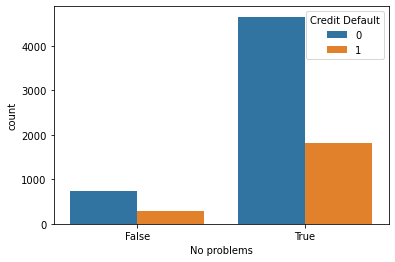

In [130]:
sns.countplot(x="No problems", hue='Credit Default', data=df)
plt.show()

In [131]:
# corr_('No problems', False, True)

In [132]:
# ----------------------
# df['Xrien'] = df['Annual Income'].isnull() & df['Credit Score'].isnull()
# df_test['Xrien'] = df_test['Annual Income'].isnull() & df_test['Credit Score'].isnull()
# ----------------------
# df['Big monthly Debt'] = df['Monthly Debt'] >= (df['Annual Income']/12)*0.2
# df_test['Big monthly Debt'] = df_test['Monthly Debt'] >= (df_test['Annual Income']/12)*0.2

## Обзор целевой переменной. Credit Default <a name=17_cd>

[к оглавлению](#index)

In [133]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

## Смотрим, что получилось <a name=look>

[к оглавлению](#index)

In [134]:
# смотрим train

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Home Ownership                     7500 non-null   object 
 1   Annual Income                      7500 non-null   float64
 2   Years in current job               7500 non-null   float64
 3   Tax Liens                          7500 non-null   float64
 4   Number of Open Accounts            7500 non-null   float64
 5   Years of Credit History            7500 non-null   float64
 6   Maximum Open Credit                7500 non-null   float64
 7   Number of Credit Problems          7500 non-null   float64
 8   Months since last delinquent       7500 non-null   float64
 9   Bankruptcies                       7500 non-null   float64
 10  Purpose                            7500 non-null   float64
 11  Term                               7500 non-null   float

In [135]:
# переделываем Purpose во FLOAT, потому-что некоторые алгоритмы отказываются работать с object

# df['Home Ownership'] = df['Home Ownership'].astype(float)
# df_test['Home Ownership'] = df_test['Home Ownership'].astype(float)

df['Purpose'] = df['Purpose'].astype(float)
df_test['Purpose'] = df_test['Purpose'].astype(float)


In [136]:
# выбираем рабочие столбцы

COL_SELECTED = [
    'Months since last delinquent NULL',
    'Current Loan Amount BIG',
    'Credit Score NULL',
    'No problems',
    
#         'Home Ownership',
        'Annual Income',
        'Years in current job',
#         'Tax Liens',
        'Number of Open Accounts',
        'Years of Credit History',
        'Maximum Open Credit',
#         'Number of Credit Problems',
        'Months since last delinquent',
#         'Bankruptcies',
        'Purpose',
        'Term',
        'Current Loan Amount',
        'Current Credit Balance',
        'Monthly Debt',
        'Credit Score',
    
        'Home Ownership_Have Mortgage',
        'Home Ownership_Home Mortgage',
        'Home Ownership_Own Home',
        'Home Ownership_Rent',
    
#         'Purpose_business loan',
#         'Purpose_buy a car',
#         'Purpose_buy house',
#         'Purpose_debt consolidation',
#         'Purpose_educational expenses',
#         'Purpose_home improvements',
#         'Purpose_major purchase',
#         'Purpose_medical bills',
#         'Purpose_moving',
#         'Purpose_other',
# #         'Purpose_renewable energy',
#         'Purpose_small business',
#         'Purpose_take a trip',
#         'Purpose_vacation',
#         'Purpose_wedding'
                         ]

In [137]:
# выбираем числовые столбцы (понадобятся, чтобы статистику строить)

COL_SELECTED_NUM = [
        'Annual Income',
        'Years in current job',
        'Number of Open Accounts',
        'Years of Credit History',
        'Current Loan Amount',
        'Current Credit Balance',
        'Monthly Debt',
        'Credit Score',
                         ]

Annual Income
MannwhitneyuResult(statistic=9347688.0, pvalue=0.4131472286486712)


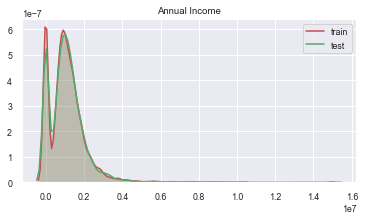

Years in current job
MannwhitneyuResult(statistic=9325493.5, pvalue=0.3434769891811027)


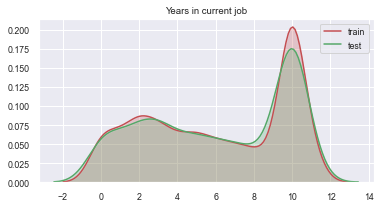

Number of Open Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


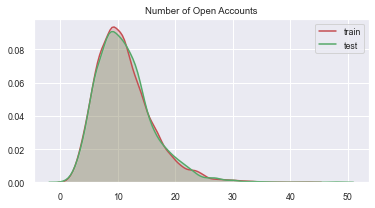

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


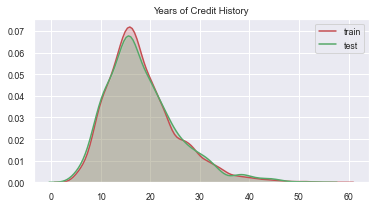

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


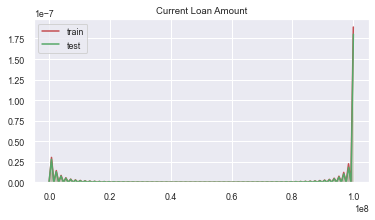

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


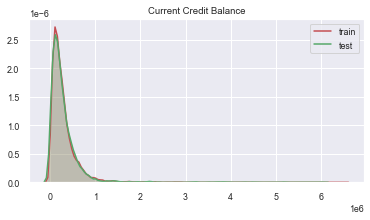

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


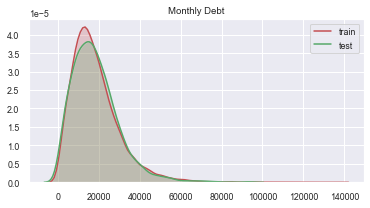

Credit Score
MannwhitneyuResult(statistic=9371108.5, pvalue=0.48705928090901335)


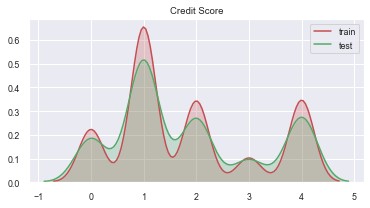

In [138]:
# смотрим похоже-ли распределение непрерывных показателей на train и test

from scipy.stats import mannwhitneyu

# p > 5% - распределения похожи
figsize = (6, 3)
for col in COL_SELECTED_NUM:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(df[col], shade=True, label='train', color='r')
    sns.kdeplot(df_test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(df[col], df_test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

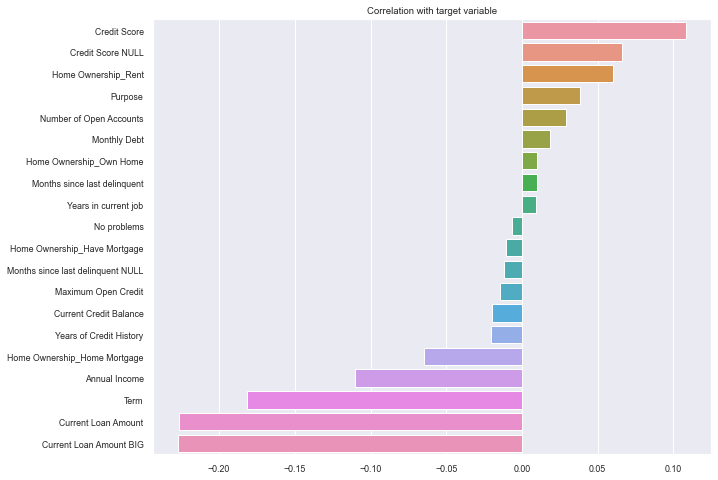

In [139]:
# смотрим влияния столбцов на целевой признак

corr_with_target = df[COL_SELECTED + ['Credit Default']].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

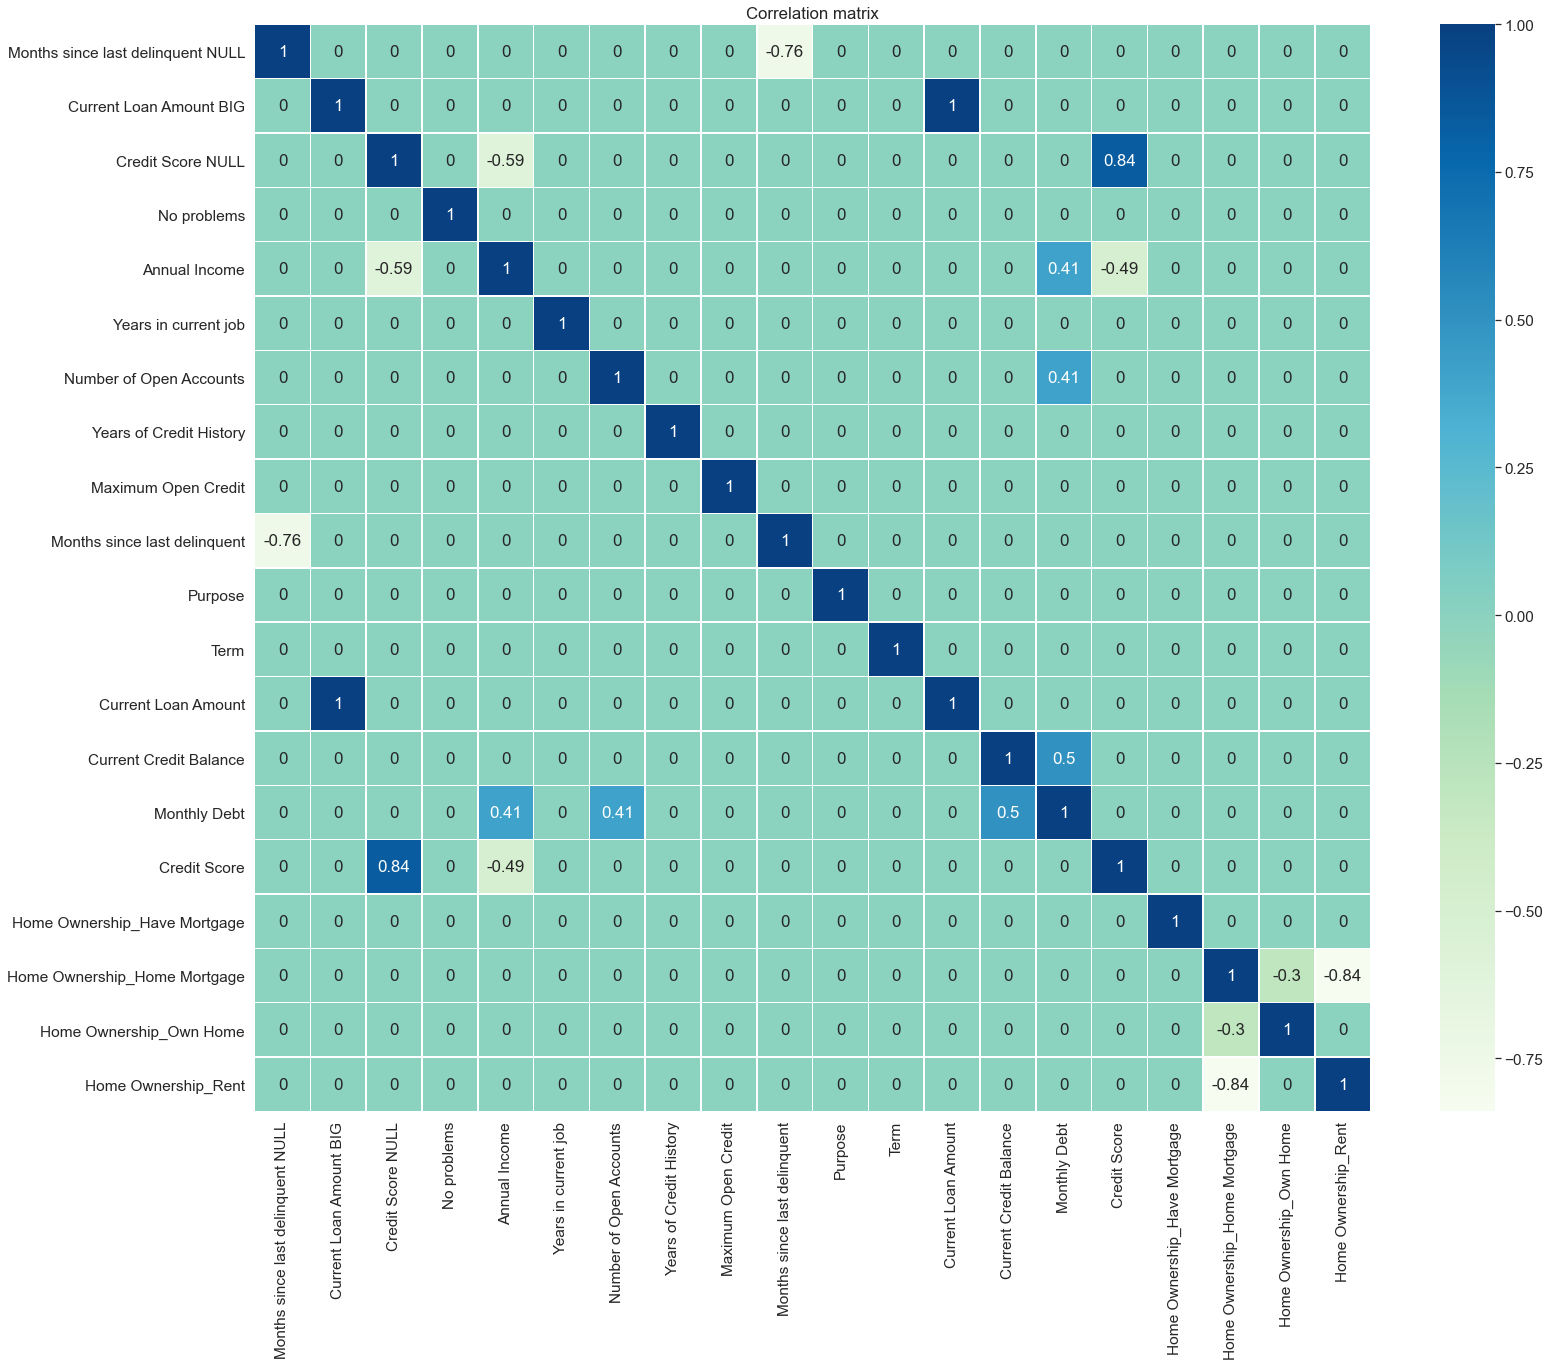

In [140]:
# матрица корреляции

plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df[COL_SELECTED].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Обучение на моделях <a name=20_learn>
    
[к оглавлению](#index)

In [141]:
X = df[COL_SELECTED]
y = df['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

In [142]:
def pred_model(model):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('*'*15)
    print(model, '  --  ', f1_score(y_test, y_test_pred))
    

In [143]:
for model in [
            LogisticRegression(C = 5, class_weight = 'balanced', penalty = 'l1', solver = 'liblinear', max_iter = 50), 
            xgb.XGBClassifier(eval_metric="logloss", random_state=21),
            KNeighborsClassifier(),
            lgbm.LGBMClassifier(random_state=21),
            catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21),
            AdaBoostClassifier(),
            SVC(),
            GaussianNB(),
            ExtraTreesClassifier(random_state=42, bootstrap=True, min_samples_split=0.3, class_weight='balanced'),
            GradientBoostingClassifier(learning_rate=7, random_state=42),
            Perceptron(class_weight='balanced')    
]:
        pred_model(model)

***************
LogisticRegression(C=5, class_weight='balanced', max_iter=50, penalty='l1',
                   solver='liblinear')   --   0.4929411764705882
***************
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=21, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)   --   0.44140625000000006
***************
KNeighborsClassifier()   --   0.28489483747609945
***************
LGBMClassifier(random_state=21)   --   0.44255319148936173
***************
<catboost.core.CatBoost

In [144]:
# ансамбль моделей

model_vote = VotingClassifier(
    estimators=[
#         ('Logistic Regression', 
#                  LogisticRegression(C = 5, class_weight = 'balanced', penalty = 'l1', solver = 'liblinear', max_iter = 50)),
#         ('XGBoost', xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=21)),
#         ('K-Neighbours', KNeighborsClassifier()),
#         ('LightGBM', lgbm.LGBMClassifier(random_state=21)),
        ('CatBooster', 
                catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)),
#         ('Ada Boost', AdaBoostClassifier()),
#         ('SVM', SVC()),
#         ('Naive Bayes', GaussianNB()),
        ('Extra Tree', 
                ExtraTreesClassifier(random_state=42, bootstrap=True, min_samples_split=0.3, class_weight='balanced')),
#         ('Gradient Boosting', GradientBoostingClassifier(learning_rate=7, random_state=42)),
#         ('Perceptron', Perceptron(class_weight='balanced'))
    ],
    voting='hard')
#     n_jobs=-1)

model_vote.fit(X_train, y_train)

y_train_pred = model_vote.predict(X_train)
y_test_pred = model_vote.predict(X_test)

print(f1_score(y_test, y_test_pred))

0.5345384118786313


In [146]:
# сохраняем результат

df_test["Credit Default"] = model_vote.predict(df_test[COL_SELECTED])

df_test['ID'] = df_test.index.tolist()
df_test['ID'] = df_test['ID']
df_test1 = df_test[['Credit Default', 'ID']]
df_test1.to_csv(r'_lesson2_final_.csv', index=False)

**Урок 2. Теория**

1. В чём различие между зависимыми и независимыми выборками?

В зависимых выборках изменения в одной выборке как-то влияют на изменения в другой выборке.<br>
В независимых выборках изменения в одной выборке вообще никак не влияет на другую выборку.

2. Когда применяются параметрические статистические критерии, а когда — их непараметрические аналоги?

Параметрические критерии: нормальное распределение, достаточный объем выборки, количественная информация (числа)
Непараметрические критерии: распределение отличное от нормального, малый объем выборки, может быть неколичественная информация

**Домашка 1. Теоретический вопросы.**

1. Приведите по 2 примера, когда лучше максимизировать Precision, а когда Recall.

Precision (точность): используется, когда важно не ошибиться при обнаружении искомых объектов. Примеры: `1- обнаружение магазинных воришек` (важно не только найти воришек, но и не обвинить невиновных) или `2- диагностика тяжелых, но трудно диагностируемых заболеваний`.
Т.е. мы должны быть уверенны, когда относим что-то к искомому классу.

Recall (полнота): использутеся, когда нам важно найти максимальное количество объектов искомого класса. Примеры: `1- обнаружение нарушителей на КПП важного объекта` или `2- обнаружение террористов`. 
Т.е. можно позволить себе ошибаться, главное - не пропустить виновных.

2. Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?

`F-мера это гармоническое среднее. Т.е. по сути это тоже среднее, но с возможностью регулировать величину значения вкладв в этот показатель Точности и Посноты при такой необходимости. `